In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pywt
import pandas as pd

In [2]:
file_name = 'CH4 954 ppm raw/00'
df_01 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
# print(df_01)


for i in range(1,100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"")
    df_01 = pd.concat([df_01, df], ignore_index=True)
print(df_01)

             x           y0          y1        y2          y3
0            0  820507000.0 -14444500.0 -227840.0 -13735900.0
1            1  859676000.0  -6947580.0 -219392.0 -12532000.0
2            2  833578000.0    829952.0 -211968.0 -13924400.0
3            3  905413000.0   8641790.0 -206080.0 -16608000.0
4            4  806905000.0  15951100.0 -196608.0 -16278500.0
...        ...          ...         ...       ...         ...
9599995  95995  702471000.0 -23103000.0 -188928.0 -11244300.0
9599996  95996  786943000.0 -16965100.0 -192512.0 -13622000.0
9599997  95997  834429000.0  -9716480.0 -176128.0 -12947500.0
9599998  95998  827305000.0  -1933570.0 -163840.0 -12815100.0
9599999  95999  863073000.0   5976830.0 -177408.0 -15446000.0

[9600000 rows x 5 columns]


In [3]:
print(df_01.y0.iloc[:9_600_000].mean())
print(df_01.y0.iloc[:9_600_000].max())
print(df_01.y0.iloc[:9_600_000].min())

326396.836213125
1041970000.0
-1550060000.0


In [4]:
# Size_pyro = 9_600_000
Size_pyro = 9_600_000

sst_pyro  = df_01.y0.iloc[:Size_pyro]
df_01.x = df_01.index
time = df_01.x.iloc[:Size_pyro]

dt = 1.0/48_000

# wavelet = 'gaus1'
# max_scale = 5.65
# min_scale = 5.25

# wavelet = 'mexh'
# max_scale = 6.9
# min_scale = 6.5


# wavelet = 'gaus3'
# max_scale = 11.2
# min_scale = 10.5


# wavelet = 'gaus4'
# max_scale = 14.1
# min_scale = 13



# wavelet = 'cgau2'
# max_scale = 11.3
# min_scale = 10.3


# wavelet = 'cmor1-1792'
# max_scale = 48
# min_scale = 45.5

# wavelet = 'cmor10-1792'
# max_scale = 50
# min_scale = 45

wavelet = 'cmor1-1778'
# max_scale = 350
# min_scale = 320

max_scale = 340
min_scale = 315


# wavelet = 'morl'
# max_scale = 23
# min_scale = 21



scales = np.arange(min_scale, max_scale, 1)

slase = 95750
size_shape = 500

delta_time = 48000
interval = int(Size_pyro/delta_time)

In [ ]:
[cfs_pyro, frequencies] = pywt.cwt(sst_pyro, scales, wavelet, dt)


period = 1.0/frequencies

print(frequencies)

# print(len(cfs_pyro))
# print(len(cfs_pyro[0]))

In [61]:
cfs_pyro = np.abs(cfs_pyro)
# cfs_pyro = np.real(cfs_pyro)

cfs_pyro_shape = np.array([cfs_pyro[i-1][slase:slase+size_shape] for i in range(len(scales))])


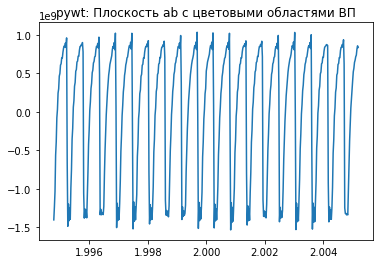

In [62]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, frequencies)


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape])

plt.show()

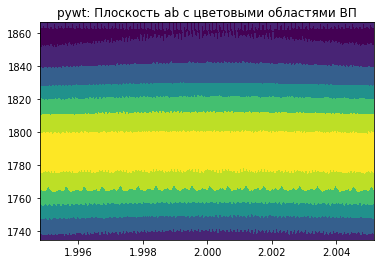

In [63]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_pyro_shape)), 10)
plt.contourf(A_scales, B_time,cfs_pyro_shape, extend='both')
plt.show()

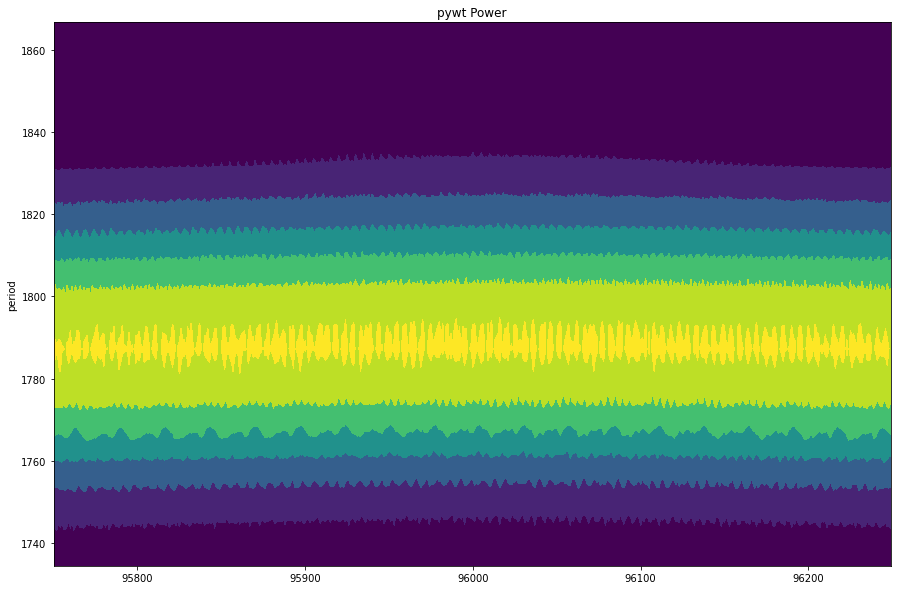

In [64]:
# power_pyro = (abs(cfs_pyro)) ** 2
# print(type(cfs_pyro))
# print(type(cfs_pyro_shape))
power_pyro_shape = (cfs_pyro_shape)**2

# # levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], frequencies, power_pyro_shape, extend='both')

ax.set_title("pywt Power")
ax.set_ylabel('period')
plt.show()

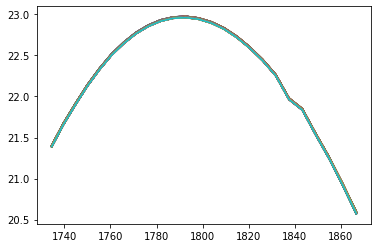

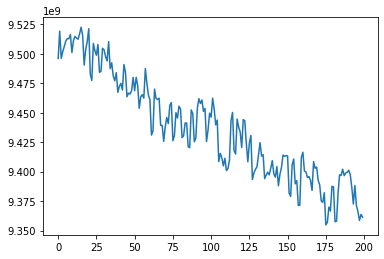

In [65]:
# power_pyro_tr = power_pyro.transpose()
power_pyro_tr = cfs_pyro.transpose()


# Amp_pyro = zeros((interval))
mean_pyro_scales = np.zeros((interval,int(len(scales))))


plt.figure('max_Amp')

Max_pyro_amp_scales = np.zeros((interval))
# Min_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    temp_pyro = power_pyro_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_scales[j][i-1] = temp_pyro[i-1].mean()
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
#     plt.plot(frequencies, mean_pyro_scales[j])
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     Min_pyro_amp_scales[j] = mean_pyro_scales[j].min()
#     print(frequencies[mean_pyro_scales[j].argmax()])
plt.show()


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()


# plt.figure('Max_pyro')
# plt.plot(Max_pyro_amp_scales - Min_pyro_amp_scales)
# plt.show()

In [66]:
from pathlib import Path  

df_mean_pyro_scales = pd.DataFrame(mean_pyro_scales)
df_mean_pyro_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_pyro_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_pyro_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)



                                              !!!KERNEL FALLED!!!

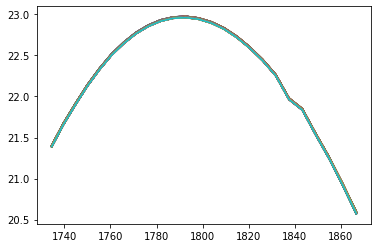

1792.6829268292684


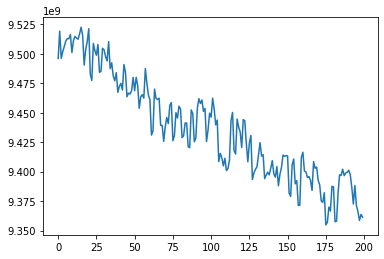

In [5]:
file_name_pyro = 'wt_raw/cmor1_1778_pyro_954.csv'
df_pyro_Amp = pd.read_csv(file_name_pyro) 
df_pyro_Amp = df_pyro_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_scales = df_pyro_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_pyro_Amp.columns)])

frequencies = 1.0/period

plt.figure('max_Amp')
    
Max_pyro_amp_scales = np.zeros((interval))
# Min_pyro_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_pyro_scales[j]))
    Max_pyro_amp_scales[j] = mean_pyro_scales[j].max()
#     Min_pyro_amp_scales[j] = mean_pyro_scales[j].mean()
#     print(1.0/period[mean_pyro_scales[j].argmax()])
plt.show()

print(1.0/period[mean_pyro_scales[1].argmax()])
# print(1.0/period[mean_pyro_scales[1].argmin()])

# print(1.0/period[mean_pyro_scales[5].argmax()])
# print(1.0/period[mean_pyro_scales[5].argmin()])


plt.figure('Max_pyro')
plt.plot(Max_pyro_amp_scales)
plt.show()    

# plt.figure('Max_pyro')
# plt.plot(Max_pyro_amp_scales - Min_pyro_amp_scales)
# plt.show()    

In [68]:
sst_oad  = df_01.y1.iloc[:Size_pyro]

[cfs_oad, frequencies] = pywt.cwt(sst_oad, scales, wavelet, dt)

period = 1.0/frequencies


In [69]:
cfs_oad = np.abs(cfs_oad)

cfs_oad_shape = np.array([cfs_oad[i-1][slase:slase+size_shape] for i in range(len(scales))])

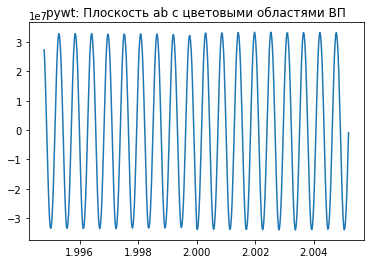

In [70]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])


plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape])

plt.show()

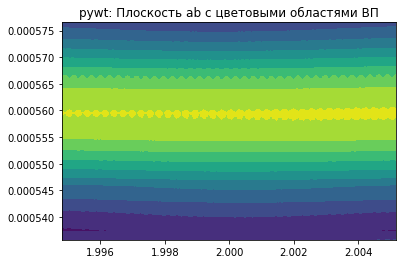

In [71]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
plt.show()

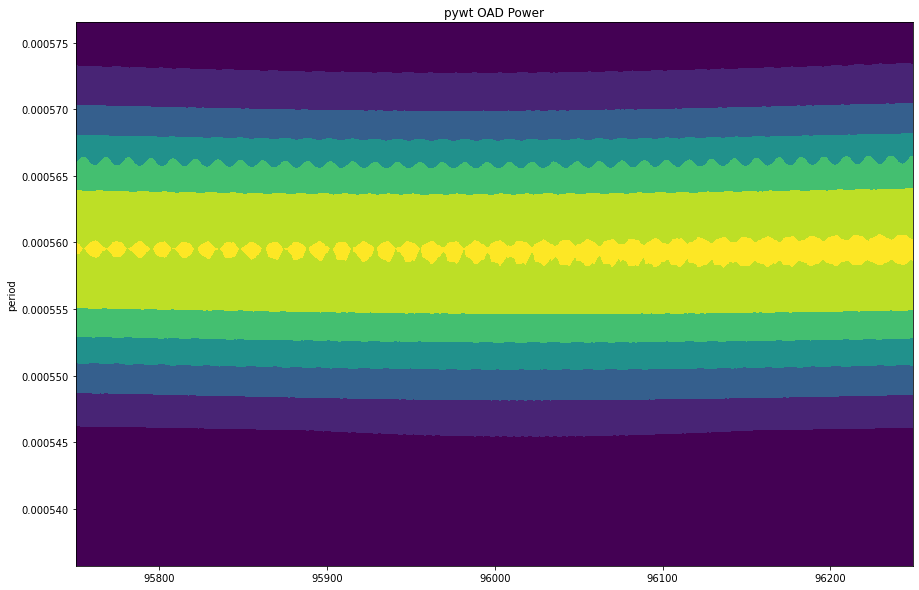

In [72]:
power_oad_shape = (cfs_oad_shape)**2


period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')

ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()

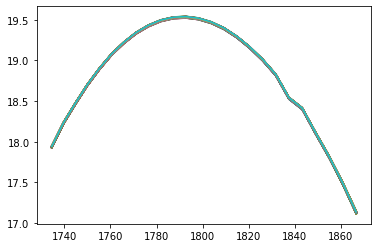

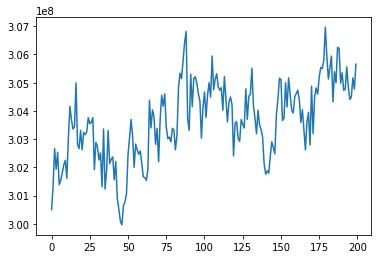

In [73]:
# power_oad_tr = power_oad.transpose()
power_oad_tr = cfs_oad.transpose()
# Amp_oad = zeros((interval))


mean_oad_scales = np.zeros((interval,int(len(scales))))

Max_oad_amp_scales = np.zeros((interval))
# Min_oad_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad = power_oad_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_scales[j][i-1] = temp_oad[i-1].mean()
    plt.plot(frequencies, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     Min_oad_amp_scales[j] = mean_oad_scales[j].min()

#     print(frequencies[mean_oad_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.abs(Max_oad_amp_scales))
# plt.plot(np.log(Max_oad_amp_scales - Min_oad_amp_scales))
plt.show()

In [74]:
from pathlib import Path  

df_mean_oad_scales = pd.DataFrame(mean_oad_scales)
df_mean_oad_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_oad_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

                                            !!! KERNEL FALLED !!!

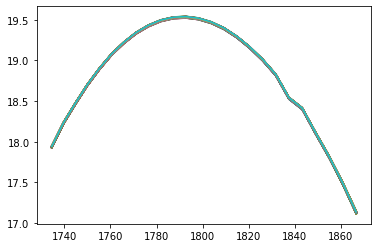

1792.6829268292684


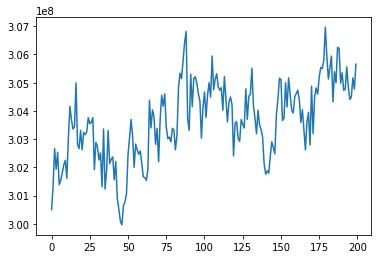

In [6]:
file_name_oad = 'wt_raw/cmor1_1778_oad_954.csv'
df_oad_Amp = pd.read_csv(file_name_oad) 
df_oad_Amp = df_oad_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_scales = df_oad_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_amp_scales = np.zeros((interval))
# Min_oad_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_oad_scales[j]))
    Max_oad_amp_scales[j] = mean_oad_scales[j].max()
#     Min_oad_amp_scales[j] = mean_oad_scales[j].mean()

    #     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_amp_scales)
# plt.plot(Max_oad_amp_scales - Min_oad_amp_scales)
plt.show()    



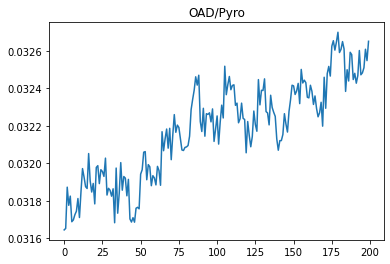

In [7]:
S_wavelet = Max_oad_amp_scales/Max_pyro_amp_scales
# S_wavelet = np.sqrt(Max_oad_amp_scales**2 - Min_oad_amp_scales**2)/np.sqrt(Max_pyro_amp_scales**2 - Min_pyro_amp_scales**2)
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_wavelet)
plt.show()

In [8]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1760
max_freq = 1820

max_intensity_OAD = np.zeros(200)
max_index_OAD = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

for i in range(100):
    ind = i if i>=10 else f"0{i}"
    file_name = f"CH4 954 ppm raw/{ind}" # в каждом файле записано 2 секунды
    df = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 

    Pyro = df.y0.values[0:SAMPLE_RATE]
    OAD = df.y1.values[0:SAMPLE_RATE]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)

    max_intensity_OAD[2*i] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df.y0.values[SAMPLE_RATE:]
    OAD = df.y1.values[SAMPLE_RATE:]
    Pyro_f = rfft(Pyro)
    OAD_f = rfft(OAD)
    max_intensity_OAD[2*i+1] = np.max(np.abs(OAD_f[min_freq:max_freq]))
    max_index_OAD[2*i+1] = np.argmax(np.abs(OAD_f[min_freq:max_freq]))
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
#     print(xf[min_freq + np.argmax(np.abs(OAD_f[min_freq:max_freq]))])

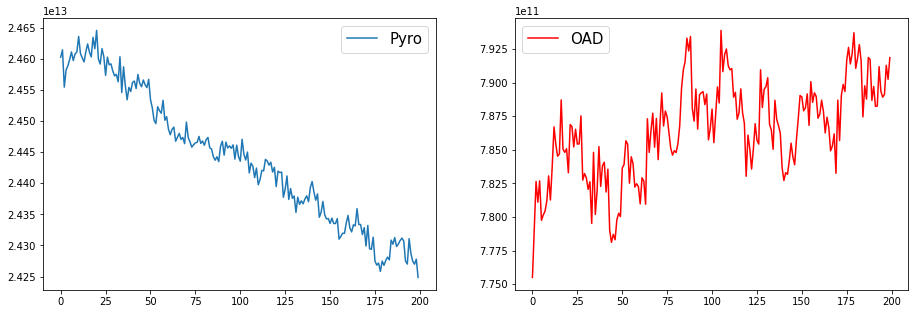

In [9]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD, 'red', label='OAD')
ax2.legend(prop={'size': 15})



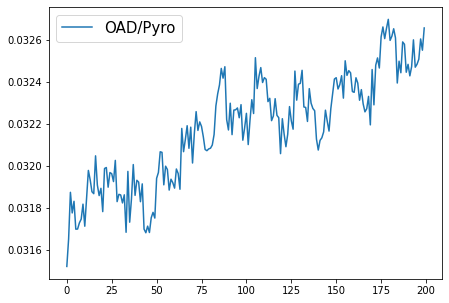

In [10]:
S_fourier = max_intensity_OAD/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

# print(S_fourier.std()/S_fourier.mean())


# from scipy.optimize import curve_fit

# def func_theory(x, A, B):
#     return A + B*x


# x = np.arange(200)

# popt, pcov = curve_fit(func_theory, x, S_fourier)

# A_opt,B_opt = popt

# print(B_opt/S_fourier.mean()*100)


# d_S_f = S_fourier - func_theory(x,A_opt,B_opt)
# print(d_S_f.std()/S_fourier.mean()*100)




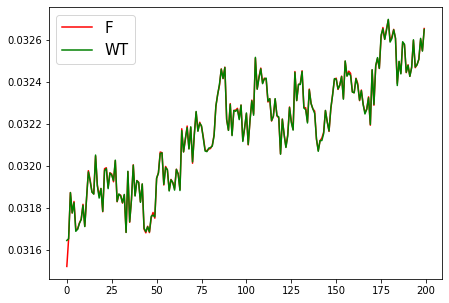

In [11]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.legend(prop={'size': 15})

In [12]:
print(S_fourier.std()-S_wavelet.std())
print(S_fourier.std()/S_fourier.mean(), S_wavelet.std()/S_wavelet.mean())
print((S_fourier - S_wavelet).mean())
print((S_fourier - S_wavelet).mean()/S_fourier.mean()*100)

1.3720187759946206e-06
0.008127999736340074 0.008085520495614597
6.368517909962484e-07
0.00197919264275071


           x            y0          y1      y2          y3
0          0  5.274840e+08 -32779000.0 -171264   3549180.0
1          1  5.807320e+08 -33825000.0 -168960   2942720.0
2          2  6.446870e+08 -33116200.0 -170752  -1469440.0
3          3  6.795840e+08 -30837800.0 -154368  -8977410.0
4          4  7.147930e+08 -27103200.0 -172032 -10121500.0
...      ...           ...         ...     ...         ...
95995  95995 -1.380270e+09  33084200.0 -185856   1310720.0
95996  95996 -1.274260e+09  31452200.0 -173568   6033410.0
95997  95997 -1.363920e+09  28560400.0 -172288  10329300.0
95998  95998 -1.293970e+09  24231900.0 -174336   8512260.0
95999  95999 -1.089390e+09  18398200.0 -167680  16976400.0

[96000 rows x 5 columns]


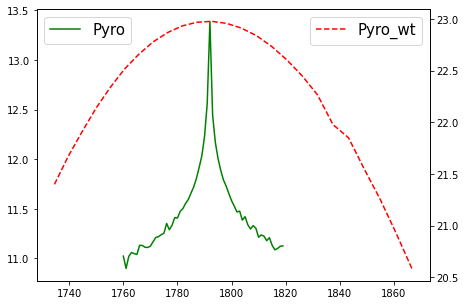

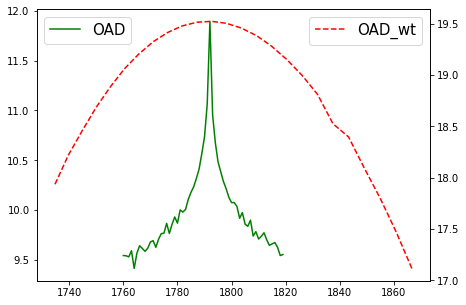

In [13]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df1)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df1.y1.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')





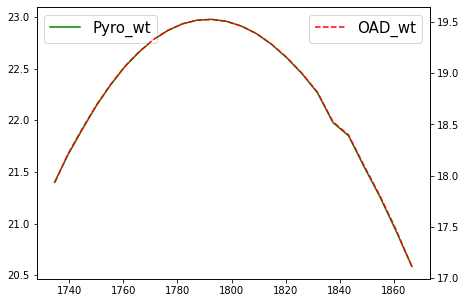

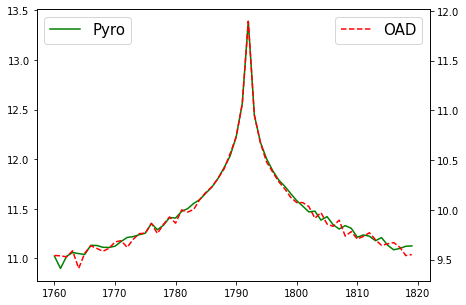

In [14]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='green', label = 'Pyro_wt')
ax2.plot(1.0 / period, np.log(mean_oad_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')




fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', linestyle='--', label = 'OAD')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

                                                NOISE OAD

In [15]:
print(df_01.y1.iloc[:Size_pyro].mean())
print(df_01.y1.iloc[:Size_pyro].std())

noise_oad = np.random.normal(0, 5 * df_01.y1.iloc[:9_600_000].std(), size = Size_pyro)
df_01['oad_noise'] = df_01.y1 + noise_oad



-362936.39139625
23816573.175047703


In [16]:
sst_oad_noise  = df_01.oad_noise.iloc[:Size_pyro]

[cfs_oad_noise, frequencies] = pywt.cwt(sst_oad_noise, scales, wavelet, dt)

period = 1.0/frequencies

In [17]:
cfs_oad_noise = np.abs(cfs_oad_noise)
cfs_oad_shape_noise = np.array([cfs_oad_noise[i-1][slase:slase+size_shape] for i in range(len(scales))])

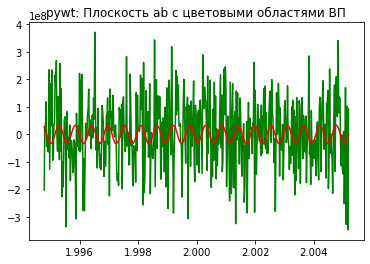

In [18]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
sst_oad = df_01.y1.iloc[:Size_pyro]

plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape], color = 'red')
plt.show()

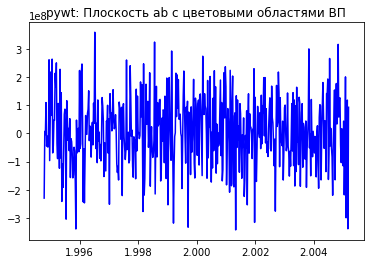

In [19]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape] - sst_oad[slase:slase+size_shape],
         color = 'blue')

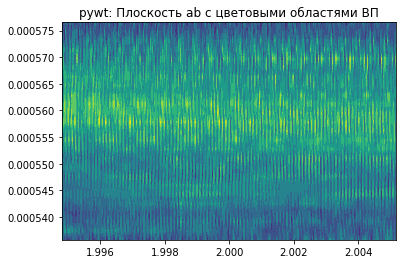

In [20]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_oad_shape_noise, 10)
plt.show()

# plt.figure('pywt: 2D-график для z = w (a,b)')
# plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# # plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
# plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
# plt.show()


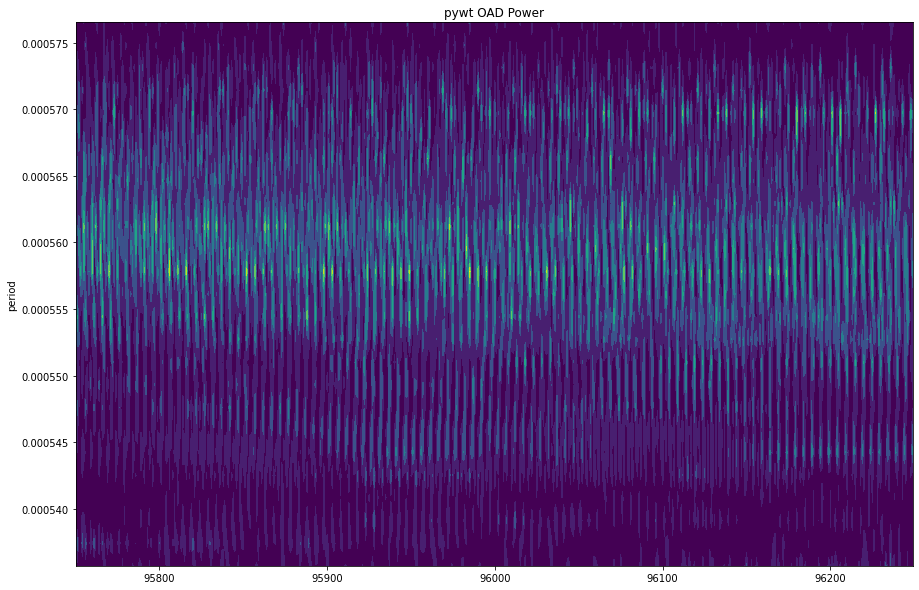

In [21]:
power_oad_shape_noise = (cfs_oad_shape_noise)**2

period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]

f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_oad_shape_noise, extend='both')
ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()


# f, ax = plt.subplots(figsize=(15, 10))
# ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')
# ax.set_title("pywt OAD Power")
# ax.set_ylabel('period')
# plt.show()

1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1787.2340425531918
1792.6829268292686
1792.6829268292686
1792.6829268292686
1787.2340425531918
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268

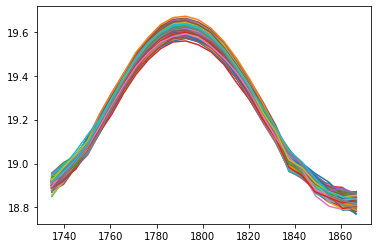

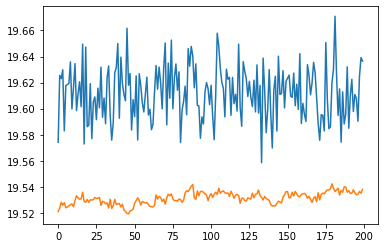

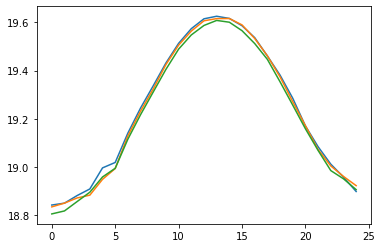

In [22]:
# power_oad_tr = power_oad.transpose()
power_oad_noise_tr = cfs_oad_noise.transpose()
# Amp_oad = zeros((interval))


mean_oad_noise_scales = np.zeros((interval,int(len(scales))))

Max_oad_noise_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_oad_noise = power_oad_noise_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_oad_noise_scales[j][i-1] = temp_oad_noise[i-1].mean()
    plt.plot(frequencies, np.log(mean_oad_noise_scales[j]))
    Max_oad_noise_amp_scales[j] = mean_oad_noise_scales[j].max()
    print(frequencies[mean_oad_noise_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_oad_noise_amp_scales))
plt.plot(np.log(Max_oad_amp_scales))

plt.show()

plt.figure('Max_oad')
plt.plot(np.log(mean_oad_noise_scales[1]))
plt.plot(np.log(mean_oad_noise_scales[10]))
plt.plot(np.log(mean_oad_noise_scales[30]))
plt.show()


In [23]:
from pathlib import Path  

df_mean_oad_noise_scales = pd.DataFrame(mean_oad_noise_scales)
df_mean_oad_noise_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_oad_noise_0_2_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_oad_noise_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

$$!!!KERNEL \ \ \ \ FALLED!!!$$

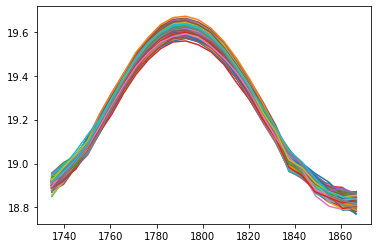

1792.6829268292684


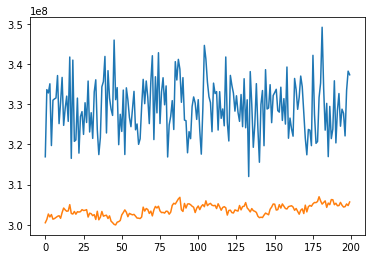

In [24]:
file_name_oad_noise = 'wt_raw/cmor1_1778_oad_noise_0_2_954.csv'
df_oad_noise_Amp = pd.read_csv(file_name_oad_noise) 
df_oad_noise_Amp = df_oad_noise_Amp.drop('Unnamed: 0', axis = 1)


mean_oad_noise_scales = df_oad_noise_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_oad_noise_Amp.columns)])

plt.figure('max_Amp')
    
Max_oad_noise_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_oad_noise_scales[j]))
    Max_oad_noise_amp_scales[j] = mean_oad_noise_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_oad_noise_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_oad_noise_amp_scales)
plt.plot(Max_oad_amp_scales)
plt.show()    

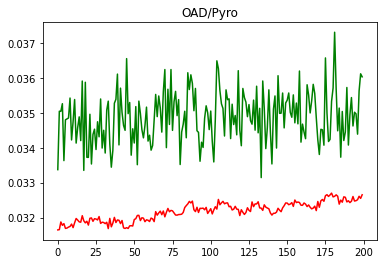

In [25]:
S_noise_wavelet = Max_oad_noise_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_noise_wavelet, color = 'green')
plt.plot(S_wavelet, color = 'red')
plt.show()

1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0


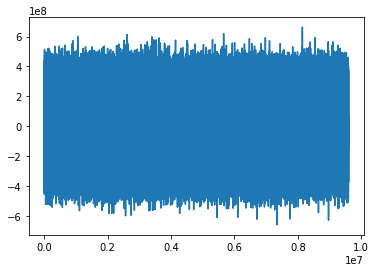

In [26]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1760
max_freq = 1820

max_intensity_OAD_noise = np.zeros(200)
max_index_OAD_noise = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

plt.plot(df_01.oad_noise)

for i in range(100):
    Pyro = df_01.y0.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)

    max_intensity_OAD_noise[2*i] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df_01.y0.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)
    max_intensity_OAD_noise[2*i+1] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i+1] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
    print(xf[min_freq + np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))])

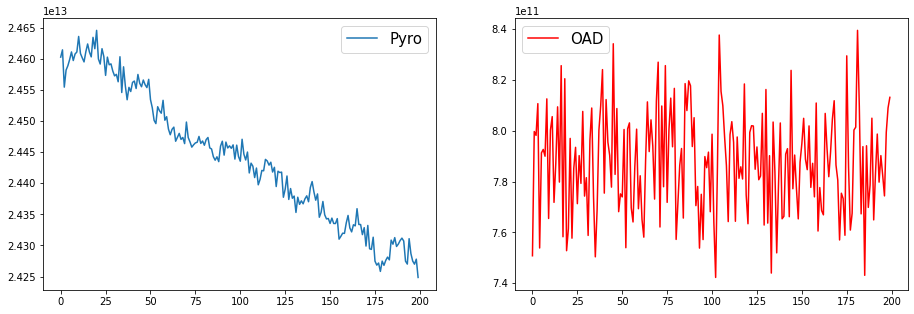

In [27]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD_noise, 'red', label='OAD')
ax2.legend(prop={'size': 15})



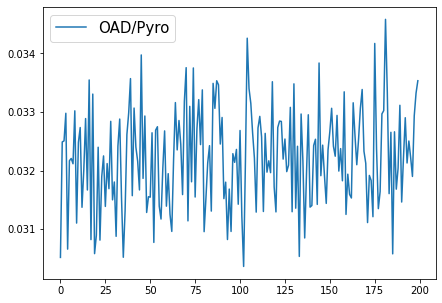

In [28]:
S_fourier_noise = max_intensity_OAD_noise/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

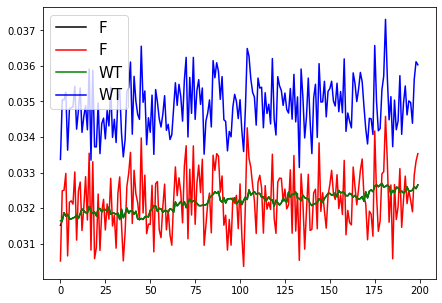

In [29]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'black')
ax1.plot([i for i in range(200)],S_fourier_noise, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.plot([i for i in range(200)],S_noise_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

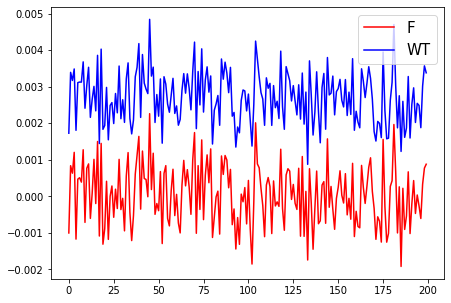

In [30]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise - S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_noise_wavelet - S_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

In [31]:
from scipy import stats

print((S_fourier_noise - S_fourier).mean())
print(np.square(S_fourier_noise - S_fourier).mean())
print(np.corrcoef(S_fourier_noise, S_fourier))


print((S_noise_wavelet - S_wavelet).mean())
print(np.square(S_noise_wavelet - S_wavelet).mean())
print(np.corrcoef(S_noise_wavelet, S_wavelet))

3.776808501123016e-05
6.880840748651531e-07
[[1.         0.19320817]
 [0.19320817 1.        ]]
0.0027093507199592603
7.865193955663359e-06
[[1.         0.23772918]
 [0.23772918 1.        ]]


               x           y0          y1        y2          y3     oad_noise
0              0  820507000.0 -14444500.0 -227840.0 -13735900.0 -8.416772e+07
1              1  859676000.0  -6947580.0 -219392.0 -12532000.0 -2.675225e+07
2              2  833578000.0    829952.0 -211968.0 -13924400.0 -4.471787e+07
3              3  905413000.0   8641790.0 -206080.0 -16608000.0 -1.189275e+08
4              4  806905000.0  15951100.0 -196608.0 -16278500.0  1.321783e+08
...          ...          ...         ...       ...         ...           ...
9599995  9599995  702471000.0 -23103000.0 -188928.0 -11244300.0  3.787041e+07
9599996  9599996  786943000.0 -16965100.0 -192512.0 -13622000.0 -1.351899e+08
9599997  9599997  834429000.0  -9716480.0 -176128.0 -12947500.0  1.268942e+07
9599998  9599998  827305000.0  -1933570.0 -163840.0 -12815100.0  2.199275e+08
9599999  9599999  863073000.0   5976830.0 -177408.0 -15446000.0 -5.062487e+07

[9600000 rows x 6 columns]


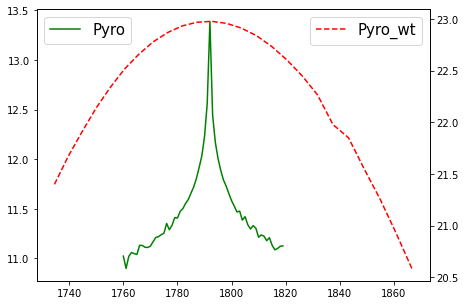

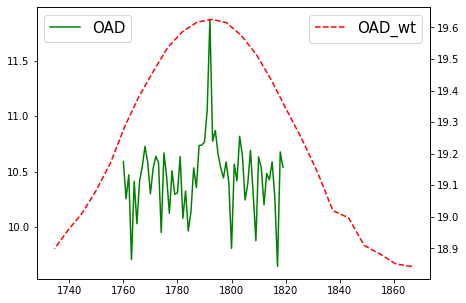

In [32]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df_01)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df_01.oad_noise.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_noise_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')



$$NOISE\ \ \ PYRO$$

In [33]:
print(df_01.y0.iloc[:Size_pyro].mean())
print(df_01.y0.iloc[:Size_pyro].std())

noise_pyro = np.random.normal(0, 5 * df_01.y0.iloc[:Size_pyro].std(), size = Size_pyro)
df_01['pyro_noise'] = df_01.y0 + noise_pyro


326396.836213125
850959197.6131235


In [34]:
sst_pyro_noise  = df_01.pyro_noise.iloc[:Size_pyro]
[cfs_pyro_noise, frequencies] = pywt.cwt(sst_pyro_noise, scales, wavelet, dt)
period = 1.0/frequencies

In [35]:
cfs_pyro_noise = np.abs(cfs_pyro_noise)
cfs_pyro_shape_noise = np.array([cfs_pyro_noise[i-1][slase:slase+size_shape] for i in range(len(scales))])

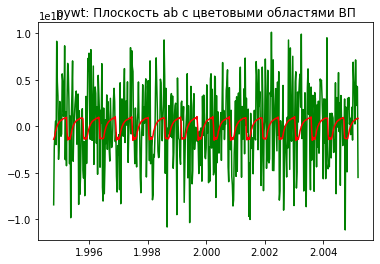

In [36]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, period)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
sst_pyro = df_01.y0.iloc[:Size_pyro]

plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_pyro_noise[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape], color = 'red')
plt.show()

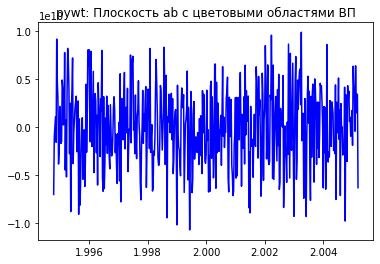

In [37]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_pyro_noise[slase:slase+size_shape] - sst_pyro[slase:slase+size_shape],
         color = 'blue')

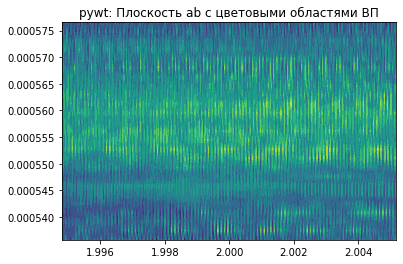

In [38]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, cfs_pyro_shape_noise, 10)
plt.show()

# plt.figure('pywt: 2D-график для z = w (a,b)')
# plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# # plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
# plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
# plt.show()


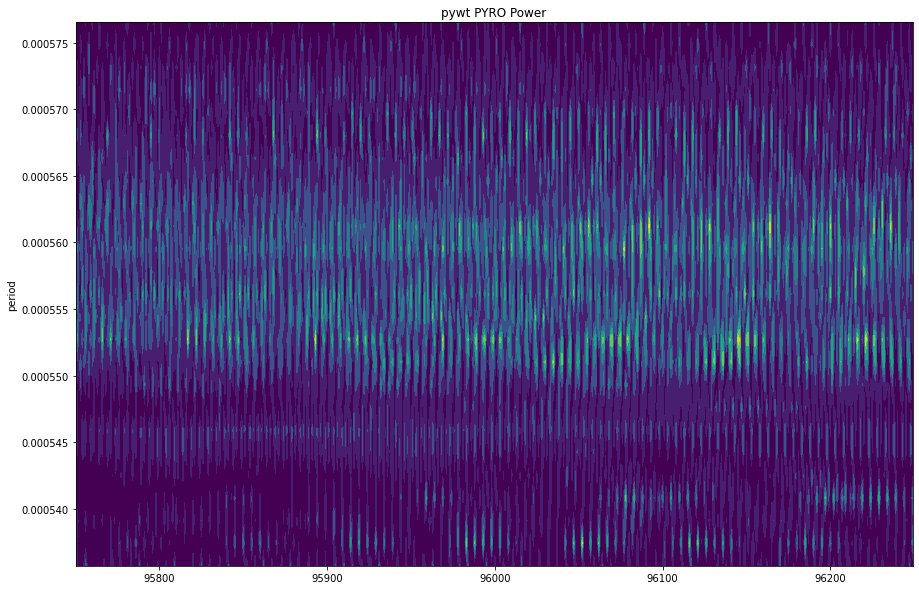

In [39]:
power_pyro_shape_noise = (cfs_pyro_shape_noise)**2

period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]

f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], period, power_pyro_shape_noise, extend='both')
ax.set_title("pywt PYRO Power")
ax.set_ylabel('period')
plt.show()


# f, ax = plt.subplots(figsize=(15, 10))
# ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')
# ax.set_title("pywt OAD Power")
# ax.set_ylabel('period')
# plt.show()

1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1787.2340425531918
1787.2340425531918
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1787.2340425531918
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1787.2340425531918
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1787.2340425531918
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268292686
1792.6829268

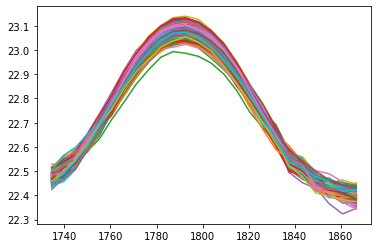

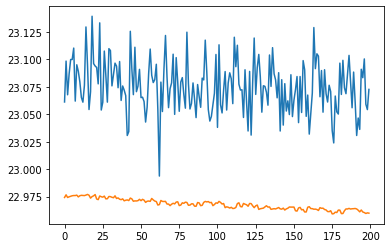

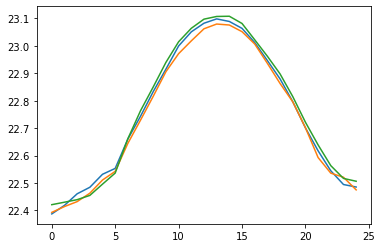

In [40]:
# power_oad_tr = power_oad.transpose()
power_pyro_noise_tr = cfs_pyro_noise.transpose()
# Amp_oad = zeros((interval))


mean_pyro_noise_scales = np.zeros((interval,int(len(scales))))

Max_pyro_noise_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_pyro_noise = power_pyro_noise_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_pyro_noise_scales[j][i-1] = temp_pyro_noise[i-1].mean()
    plt.plot(frequencies, np.log(mean_pyro_noise_scales[j]))
    Max_pyro_noise_amp_scales[j] = mean_pyro_noise_scales[j].max()
    print(frequencies[mean_pyro_noise_scales[j].argmax()])
plt.show()

plt.figure('Max_pyro')
plt.plot(np.log(Max_pyro_noise_amp_scales))
plt.plot(np.log(Max_pyro_amp_scales))

plt.show()

plt.figure('Max_pyro')
plt.plot(np.log(mean_pyro_noise_scales[1]))
plt.plot(np.log(mean_pyro_noise_scales[10]))
plt.plot(np.log(mean_pyro_noise_scales[30]))
plt.show()


In [41]:
from pathlib import Path  

df_mean_pyro_noise_scales = pd.DataFrame(mean_pyro_noise_scales)
df_mean_pyro_noise_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_pyro_noise_0_2_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_pyro_noise_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

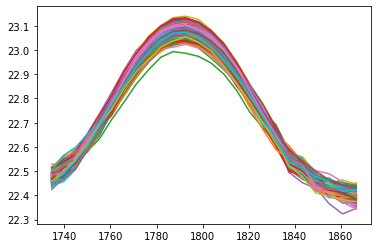

1792.6829268292684


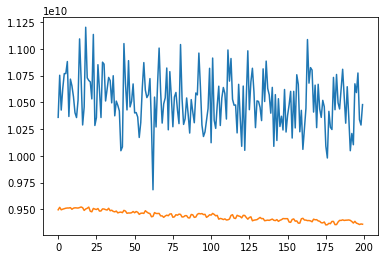

In [42]:
file_name_pyro_noise = 'wt_raw/cmor1_1778_pyro_noise_0_2_954.csv'
df_pyro_noise_Amp = pd.read_csv(file_name_pyro_noise) 
df_pyro_noise_Amp = df_pyro_noise_Amp.drop('Unnamed: 0', axis = 1)


mean_pyro_noise_scales = df_pyro_noise_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_pyro_noise_Amp.columns)])

plt.figure('max_Amp')
    
Max_pyro_noise_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
    plt.plot(frequencies, np.log(mean_pyro_noise_scales[j]))
    Max_pyro_noise_amp_scales[j] = mean_pyro_noise_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_oad_scales[1]))
print(1.0/period[mean_pyro_noise_scales[1].argmax()])



plt.figure('Max_pyro')
plt.plot(Max_pyro_noise_amp_scales)
plt.plot(Max_pyro_amp_scales)
plt.show()    

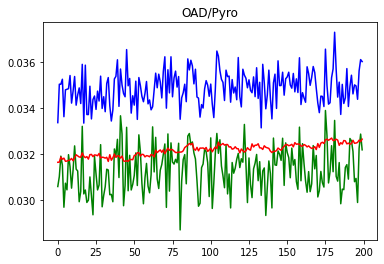

In [43]:
S_noise_noise_wavelet = Max_oad_noise_amp_scales/Max_pyro_noise_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_noise_noise_wavelet, color = 'green')
plt.plot(S_wavelet, color = 'red')
plt.plot(S_noise_wavelet, color = 'blue')
plt.show()

1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0


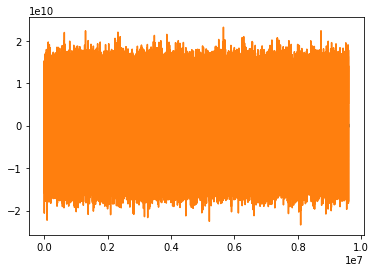

In [44]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1760
max_freq = 1820

max_intensity_OAD_noise = np.zeros(200)
max_index_OAD_noise = np.zeros(200)
max_intensity_Pyro_noise = np.zeros(200)
max_index_Pyro_noise = np.zeros(200)

plt.plot(df_01.oad_noise)
plt.plot(df_01.pyro_noise)
for i in range(100):
    Pyro_noise = df_01.pyro_noise.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_noise_f = rfft(Pyro_noise)
    OAD_noise_f = rfft(OAD_noise)

    max_intensity_OAD_noise[2*i] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro_noise[2*i] = np.max(np.abs(Pyro_noise_f[min_freq:max_freq]))
    max_index_Pyro_noise[2*i] = np.argmax(np.abs(Pyro_noise_f[min_freq:max_freq]))

    Pyro_noise = df_01.pyro_noise.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    Pyro_noise_f = rfft(Pyro_noise)
    OAD_noise_f = rfft(OAD_noise)
    max_intensity_OAD_noise[2*i+1] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i+1] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro_noise[2*i+1] = np.max(np.abs(Pyro_noise_f[min_freq:max_freq]))
    max_index_Pyro_noise[2*i+1] = np.argmax(np.abs(Pyro_noise_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
    print(xf[min_freq + np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))])

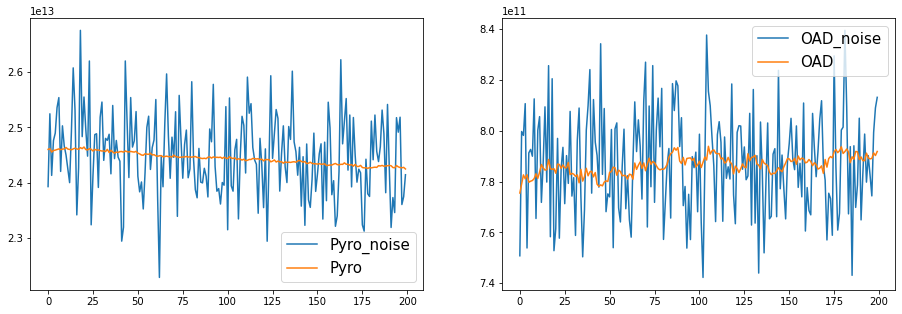

In [45]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro_noise, label='Pyro_noise')
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD_noise, label='OAD_noise')
ax2.plot([i for i in range(200)],max_intensity_OAD, label='OAD')
ax2.legend(prop={'size': 15})


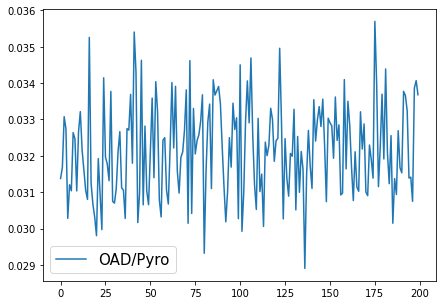

In [46]:
S_fourier_noise_noise = max_intensity_OAD_noise/max_intensity_Pyro_noise
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise_noise, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

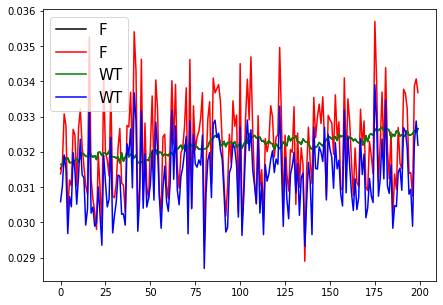

In [47]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'black')
ax1.plot([i for i in range(200)],S_fourier_noise_noise, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.plot([i for i in range(200)],S_noise_noise_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

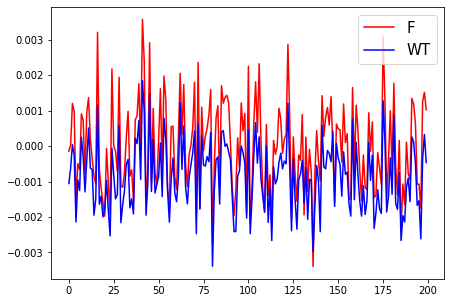

In [48]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise_noise - S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_noise_noise_wavelet - S_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

In [49]:
from scipy import stats

print((S_fourier_noise_noise - S_fourier).mean())
print(np.square(S_fourier_noise_noise - S_fourier).mean())
print((S_fourier_noise_noise - S_fourier).std())
print(np.corrcoef(S_fourier_noise_noise, S_fourier))


print((S_noise_noise_wavelet - S_wavelet).mean())
print(np.square(S_noise_noise_wavelet - S_wavelet).mean())
print((S_noise_noise_wavelet - S_wavelet).std())
print(np.corrcoef(S_noise_noise_wavelet, S_wavelet))

-1.2348769986373961e-05
1.6070167379046973e-06
0.001267621491528335
[[1.         0.17018202]
 [0.17018202 1.        ]]
-0.0008451366409208178
1.6406836406564816e-06
0.0009625111421846285
[[1.         0.20098344]
 [0.20098344 1.        ]]


               x           y0          y1        y2          y3     oad_noise  \
0              0  820507000.0 -14444500.0 -227840.0 -13735900.0 -8.416772e+07   
1              1  859676000.0  -6947580.0 -219392.0 -12532000.0 -2.675225e+07   
2              2  833578000.0    829952.0 -211968.0 -13924400.0 -4.471787e+07   
3              3  905413000.0   8641790.0 -206080.0 -16608000.0 -1.189275e+08   
4              4  806905000.0  15951100.0 -196608.0 -16278500.0  1.321783e+08   
...          ...          ...         ...       ...         ...           ...   
9599995  9599995  702471000.0 -23103000.0 -188928.0 -11244300.0  3.787041e+07   
9599996  9599996  786943000.0 -16965100.0 -192512.0 -13622000.0 -1.351899e+08   
9599997  9599997  834429000.0  -9716480.0 -176128.0 -12947500.0  1.268942e+07   
9599998  9599998  827305000.0  -1933570.0 -163840.0 -12815100.0  2.199275e+08   
9599999  9599999  863073000.0   5976830.0 -177408.0 -15446000.0 -5.062487e+07   

           pyro_noise  
0  

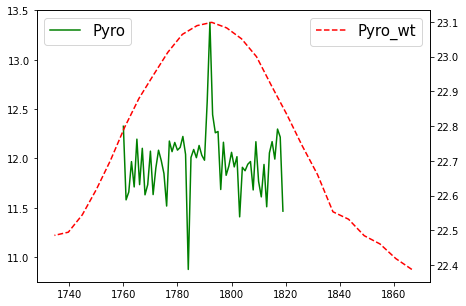

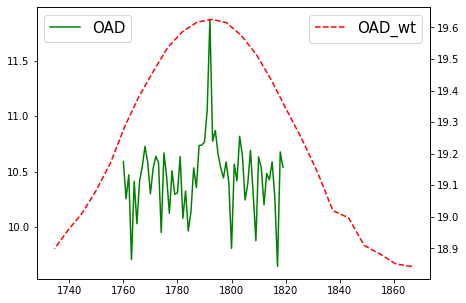

In [50]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df_01)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro_noise = df_01.pyro_noise.values[:SAMPLE_RATE]
Pyro_noise_f = rfft(Pyro_noise)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD_noise = df_01.oad_noise.values[:SAMPLE_RATE]
OAD_noise_f = rfft(OAD_noise)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_noise_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_noise_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_noise_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_noise_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

$$DWT\ \ \ Filtration$$

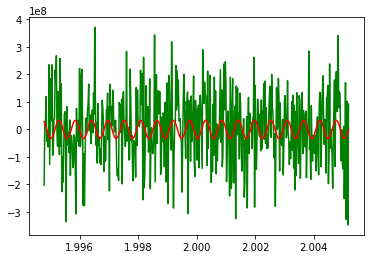

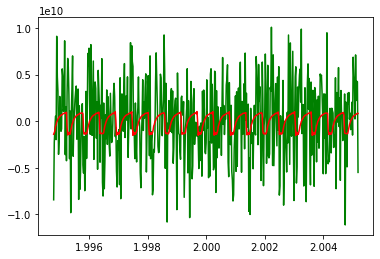

In [51]:
sst_oad_noise  = df_01.oad_noise.iloc[:Size_pyro]
sst_oad  = df_01.y1.iloc[:Size_pyro]

sst_pyro_noise  = df_01.pyro_noise.iloc[:Size_pyro]
sst_pyro  = df_01.y0.iloc[:Size_pyro]


plt.figure('OAD and OAD noise')
plt.plot(time[slase:slase+size_shape]*dt, sst_oad_noise[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape], color = 'red')

plt.figure('PYRO and PYRO noise')
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro_noise[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape], color = 'red')



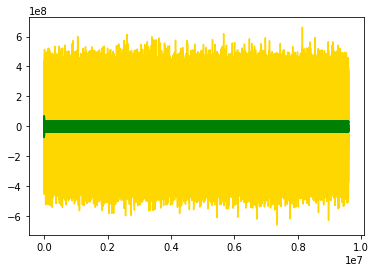

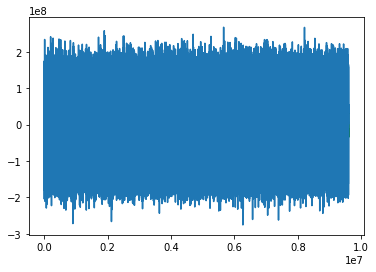

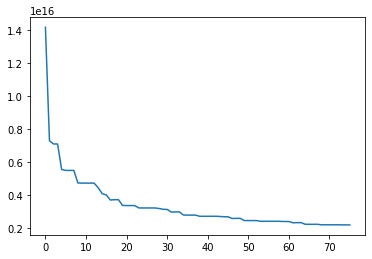

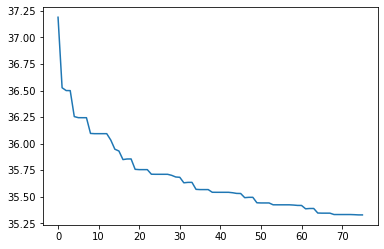

In [52]:
Size_iter = 5
tresh = 0.3

# min_db = 0
# max_db = 39
# std_noise = np.zeros((max_db-1-min_db)*Size_iter + 1)

bior = ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', \
        'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', \
        'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8'
       ]
std_noise = np.zeros(Size_iter*len(bior) + 1)






std_noise[0] = np.square(sst_oad_noise - sst_oad).mean()

sst_tr_oad = sst_oad_noise

plt.figure('dwt filter')
plt.plot(sst_oad_noise, color = 'gold')
plt.plot(sst_oad, color = 'green')

# for j in range(0,Size_iter,1):
#     for i in range(min_db,max_db-1,1):
#         (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i+1),mode = 'zero')
        
#         max_sst_cD = np.abs(sst_cD).max()
#         new_sst_cD = pywt.threshold(sst_cD, tresh*max_sst_cD, 'soft')        
        
#         sst_tr = pywt.idwt(sst_cA, new_sst_cD, 'db' + str(i+1), mode = 'zero')
#         std_noise[1 + (i - min_db) + j*(max_db-1-min_db)] = np.square(sst_tr - sst_oad).mean()
        
for j in range(0,Size_iter,1):
    for i, bio in enumerate(bior): 
        (sst_cA, sst_cD) = pywt.dwt(sst_tr_oad, bio, mode = 'zero')

        max_sst_cD = np.abs(sst_cD).max()
        new_sst_cD = pywt.threshold(sst_cD, tresh*max_sst_cD, 'soft')        
        
        sst_tr_oad = pywt.idwt(sst_cA, new_sst_cD, bio, mode = 'zero')
        std_noise[1 + j*len(bior) + i] = np.square(sst_tr_oad - sst_oad).mean()

        

plt.figure('dwt filter new')
# plt.plot(sst_oad_noise, color = 'gold')
plt.plot(sst_oad, color = 'green')        
plt.plot(sst_tr_oad)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))

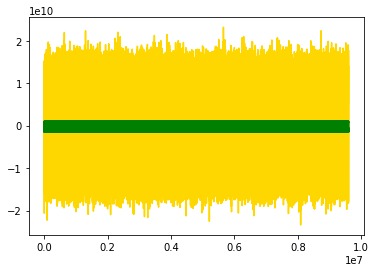

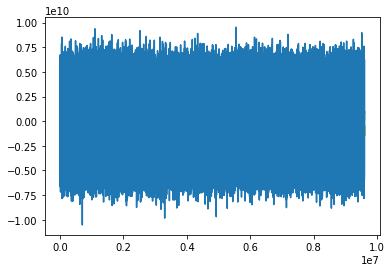

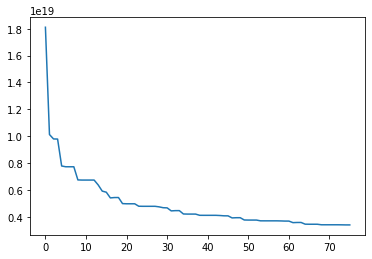

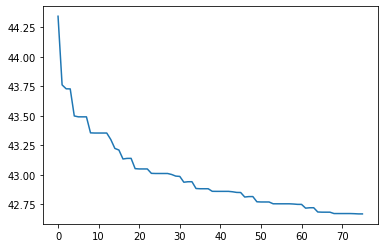

In [53]:
Size_iter = 5
tresh = 0.3

# min_db = 0
# max_db = 39
# std_noise = np.zeros((max_db-1-min_db)*Size_iter + 1)

bior = ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', \
        'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', \
        'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8'
       ]
std_noise = np.zeros(Size_iter*len(bior) + 1)






std_noise[0] = np.square(sst_pyro_noise - sst_pyro).mean()

sst_tr_pyro = sst_pyro_noise

plt.figure('dwt filter')
plt.plot(sst_pyro_noise, color = 'gold')
plt.plot(sst_pyro, color = 'green')

# for j in range(0,Size_iter,1):
#     for i in range(min_db,max_db-1,1):
#         (sst_cA, sst_cD) = pywt.dwt(sst_tr, 'db' + str(i+1),mode = 'zero')
        
#         max_sst_cD = np.abs(sst_cD).max()
#         new_sst_cD = pywt.threshold(sst_cD, tresh*max_sst_cD, 'soft')        
        
#         sst_tr = pywt.idwt(sst_cA, new_sst_cD, 'db' + str(i+1), mode = 'zero')
#         std_noise[1 + (i - min_db) + j*(max_db-1-min_db)] = np.square(sst_tr - sst_oad).mean()
        
for j in range(0,Size_iter,1):
    for i, bio in enumerate(bior): 
        (sst_cA, sst_cD) = pywt.dwt(sst_tr_pyro, bio, mode = 'zero')

        max_sst_cD = np.abs(sst_cD).max()
        new_sst_cD = pywt.threshold(sst_cD, tresh*max_sst_cD, 'soft')        
        
        sst_tr_pyro = pywt.idwt(sst_cA, new_sst_cD, bio, mode = 'zero')
        std_noise[1 + j*len(bior) + i] = np.square(sst_tr_pyro - sst_oad).mean()

        

plt.figure('dwt filter new')
# plt.plot(sst_oad_noise, color = 'gold')
plt.plot(sst_pyro, color = 'green')        
plt.plot(sst_tr_pyro)


plt.figure('std_noise')
plt.plot(std_noise)

plt.figure('log std_noise')
plt.plot(np.log(std_noise))

In [54]:
# print(len(sst_tr))

[cfs_tr_oad_noise, frequencies] = pywt.cwt(sst_tr_oad, scales, wavelet, dt)

period = 1.0/frequencies

In [55]:
cfs_tr_oad_noise = np.abs(cfs_tr_oad_noise)
cfs_tr_oad_shape_noise = np.array([cfs_tr_oad_noise[i-1][slase:slase+size_shape] for i in range(len(scales))])

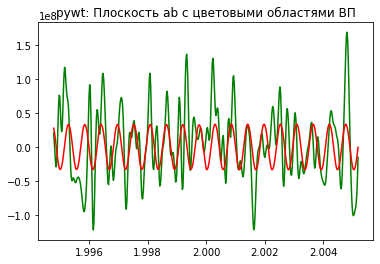

In [56]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, frequencies)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
# sst_oad = df_01.y1.iloc[:Size_pyro]

plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_tr_oad[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_oad[slase:slase+size_shape], color = 'red')
plt.show()

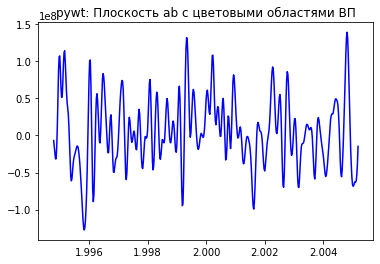

In [57]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_tr_oad[slase:slase+size_shape] - sst_oad[slase:slase+size_shape],
         color = 'blue')

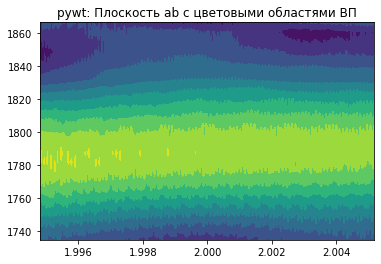

In [58]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, np.abs(cfs_tr_oad_shape_noise), 10)
plt.show()

# plt.figure('pywt: 2D-график для z = w (a,b)')
# plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# # plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
# plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
# plt.show()

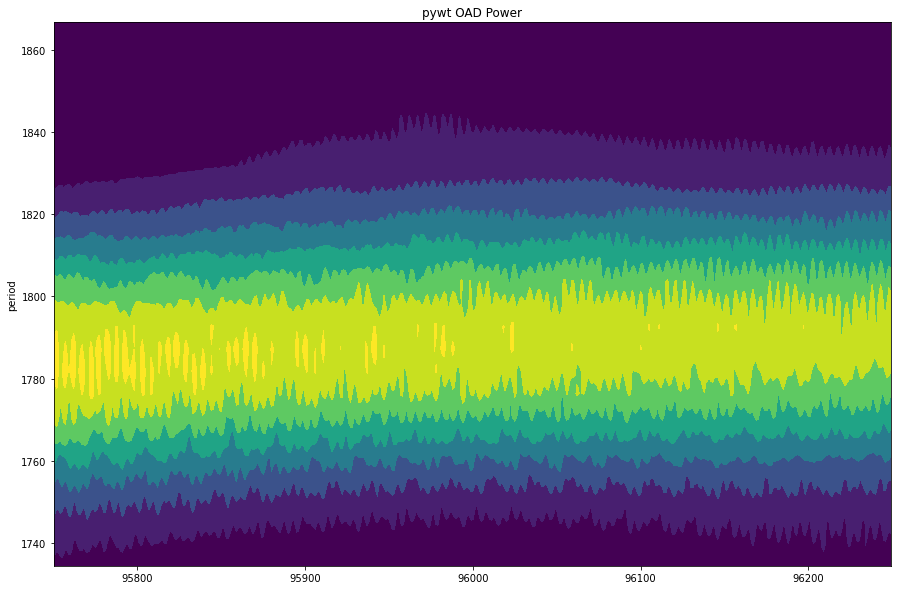

In [59]:
power_tr_oad_shape_noise = (cfs_tr_oad_shape_noise)**2

period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]

f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], frequencies, np.abs(power_tr_oad_shape_noise), extend='both')
ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()


# f, ax = plt.subplots(figsize=(15, 10))
# ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')
# ax.set_title("pywt OAD Power")
# ax.set_ylabel('period')
# plt.show()

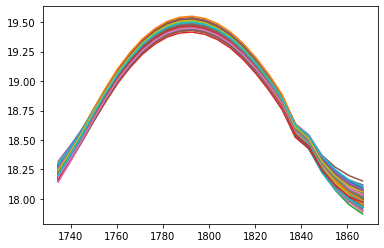

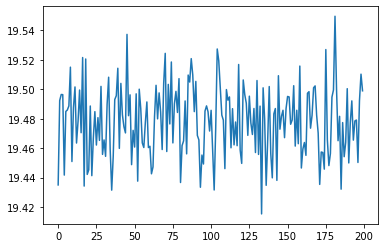

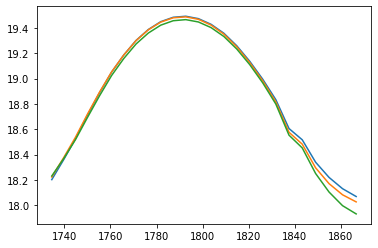

In [60]:
# power_oad_tr = power_oad.transpose()
power_tr_oad_noise_tr = cfs_tr_oad_noise.transpose()
# Amp_oad = zeros((interval))


mean_tr_oad_noise_scales = np.zeros((interval,int(len(scales))))

Max_tr_oad_noise_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_tr_oad_noise = power_tr_oad_noise_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_tr_oad_noise_scales[j][i-1] = temp_tr_oad_noise[i-1].mean()
    plt.plot(frequencies, np.log(mean_tr_oad_noise_scales[j]))
    Max_tr_oad_noise_amp_scales[j] = mean_tr_oad_noise_scales[j].max()
#     print(frequencies[mean_tr_oad_noise_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_tr_oad_noise_amp_scales))
# plt.plot(np.log(Max_tr_oad_amp_scales))

plt.show()

plt.figure('Max_oad 1')
plt.plot(frequencies, np.log(mean_tr_oad_noise_scales[1]))
plt.plot(frequencies, np.log(mean_tr_oad_noise_scales[10]))
plt.plot(frequencies, np.log(mean_tr_oad_noise_scales[30]))
plt.show()

In [62]:
from pathlib import Path  

df_mean_tr_oad_noise_scales = pd.DataFrame(mean_tr_oad_noise_scales)
df_mean_tr_oad_noise_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_tr_oad_noise_0_2_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_tr_oad_noise_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

<Figure size 432x288 with 0 Axes>

1792.6829268292684


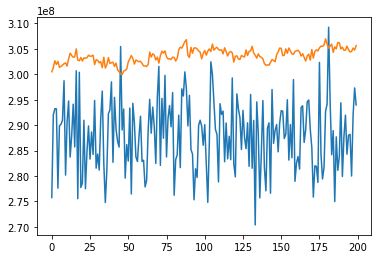

In [63]:
file_name_tr_oad_noise = 'wt_raw/cmor1_1778_tr_oad_noise_0_2_954.csv'
df_tr_oad_noise_Amp = pd.read_csv(file_name_tr_oad_noise) 
df_tr_oad_noise_Amp = df_tr_oad_noise_Amp.drop('Unnamed: 0', axis = 1)


mean_tr_oad_noise_scales = df_tr_oad_noise_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_tr_oad_noise_Amp.columns)])

plt.figure('max_Amp')
    
Max_tr_oad_noise_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
#     plt.plot(frequencies, np.log(mean_tr_oad_noise_scales[j]))
    Max_tr_oad_noise_amp_scales[j] = mean_tr_oad_noise_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_tr_oad_noise_scales[1]))
# plt.plot(1.0 / period, np.log(mean_tr_oad_noise_scales[2]))
# plt.plot(1.0 / period, np.log(mean_tr_oad_noise_scales[3]))
print(1.0/period[mean_tr_oad_noise_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_tr_oad_noise_amp_scales)
plt.plot(Max_oad_amp_scales)
plt.show()    

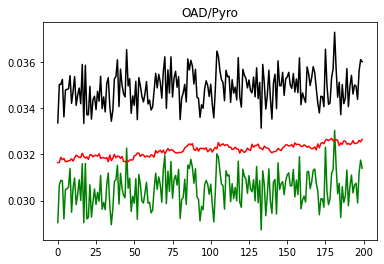

In [64]:
S_tr_noise_wavelet = Max_tr_oad_noise_amp_scales/Max_pyro_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_noise_wavelet, color = 'black')
plt.plot(S_tr_noise_wavelet, color = 'green')
plt.plot(S_wavelet, color = 'red')
plt.show()

1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0
1792.0


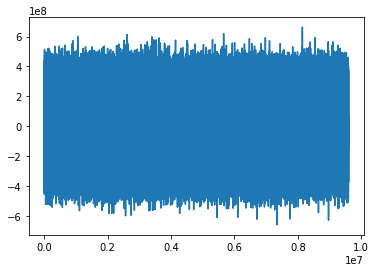

In [65]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math

SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

min_freq = 1760
max_freq = 1820

max_intensity_OAD_noise = np.zeros(200)
max_index_OAD_noise = np.zeros(200)
max_intensity_Pyro = np.zeros(200)
max_index_Pyro = np.zeros(200)

plt.plot(df_01.oad_noise)

for i in range(100):
    Pyro = df_01.y0.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*2*i:SAMPLE_RATE*(2*i+1)]

    xf = rfftfreq(N, 1 / SAMPLE_RATE)
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)

    max_intensity_OAD_noise[2*i] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))

    Pyro = df_01.y0.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    OAD_noise = df_01.oad_noise.values[SAMPLE_RATE*(2*i+1):SAMPLE_RATE*(2*i+2)]
    Pyro_f = rfft(Pyro)
    OAD_noise_f = rfft(OAD_noise)
    max_intensity_OAD_noise[2*i+1] = np.max(np.abs(OAD_noise_f[min_freq:max_freq]))
    max_index_OAD_noise[2*i+1] = np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))
    
    max_intensity_Pyro[2*i+1] = np.max(np.abs(Pyro_f[min_freq:max_freq]))
    max_index_Pyro[2*i+1] = np.argmax(np.abs(Pyro_f[min_freq:max_freq]))
#     print(xf[min_freq + np.argmax(np.abs(Pyro_f[min_freq:max_freq]))])
    print(xf[min_freq + np.argmax(np.abs(OAD_noise_f[min_freq:max_freq]))])

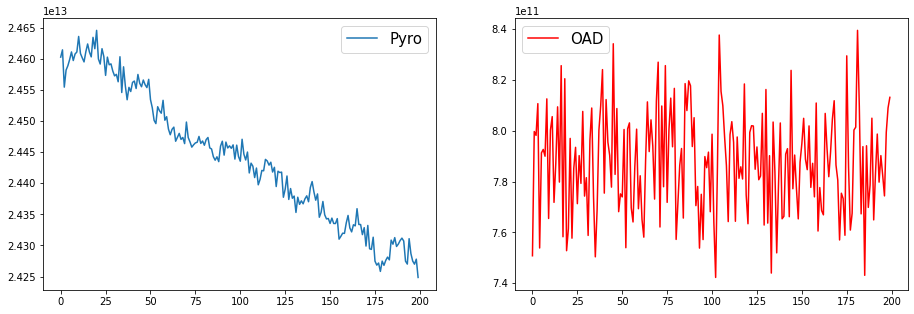

In [66]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],max_intensity_Pyro, label='Pyro')
ax1.legend(prop={'size': 15})

ax2 = fig.add_subplot(122)
ax2.plot([i for i in range(200)],max_intensity_OAD_noise, 'red', label='OAD')
ax2.legend(prop={'size': 15})


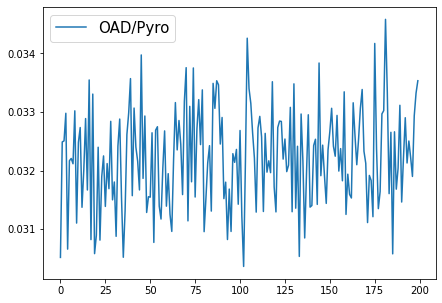

In [67]:
S_fourier_noise = max_intensity_OAD_noise/max_intensity_Pyro
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise, label='OAD/Pyro')
ax1.legend(prop={'size': 15})

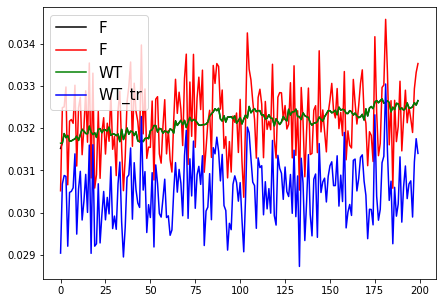

In [68]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier, label='F', color = 'black')
ax1.plot([i for i in range(200)],S_fourier_noise, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_wavelet, label='WT', color = 'green')
ax1.plot([i for i in range(200)],S_tr_noise_wavelet, label='WT_tr', color = 'blue')
# ax1.plot([i for i in range(200)],S_noise_wavelet, label='WT', color = 'tomato')
ax1.legend(prop={'size': 15})

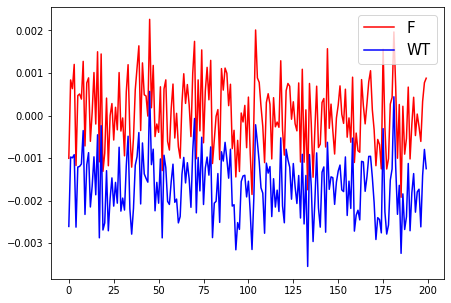

In [69]:
fig = plt.figure()
fig.set_size_inches(15.5, 5)
ax1 = fig.add_subplot(121)
ax1.plot([i for i in range(200)],S_fourier_noise - S_fourier, label='F', color = 'red')
ax1.plot([i for i in range(200)],S_tr_noise_wavelet - S_wavelet, label='WT', color = 'blue')
ax1.legend(prop={'size': 15})

In [70]:
print('noise fourier forier')
print((S_fourier_noise - S_fourier).mean())
print(np.square(S_fourier_noise - S_fourier).mean())
print(np.corrcoef(S_fourier_noise, S_fourier))

print('noise tr Wavelet Wavelet')
print((S_tr_noise_wavelet - S_wavelet).mean())
print(np.square(S_tr_noise_wavelet - S_wavelet).mean())
print(np.corrcoef(S_tr_noise_wavelet, S_wavelet))

print('noise Wavelet Wawelet')
print((S_noise_wavelet - S_wavelet).mean())
print(np.square(S_noise_wavelet - S_wavelet).mean())
print(np.corrcoef(S_noise_wavelet, S_wavelet))

print('Wavelet forier')
print((S_wavelet - S_fourier).mean())
print(np.square(S_wavelet - S_fourier).mean())
print(np.corrcoef(S_wavelet, S_fourier))


print('noise tr Wavelet noise fourier')
print((S_tr_noise_wavelet - S_fourier_noise).mean())
print(np.square(S_tr_noise_wavelet - S_fourier_noise).mean())
print(np.corrcoef(S_tr_noise_wavelet, S_fourier_noise))



noise fourier forier
3.776808501123016e-05
6.880840748651531e-07
[[1.         0.19320817]
 [0.19320817 1.        ]]
noise tr Wavelet Wavelet
-0.0016560371998234913
3.289254707911829e-06
[[1.         0.22009912]
 [0.22009912 1.        ]]
noise Wavelet Wawelet
0.0027093507199592603
7.865193955663359e-06
[[1.         0.23772918]
 [0.23772918 1.        ]]
Wavelet forier
-6.368517909962484e-07
9.661473663240921e-11
[[1.         0.99930686]
 [0.99930686 1.        ]]
noise tr Wavelet noise fourier
-0.001694442136625718
2.9207970107401967e-06
[[1.         0.96656119]
 [0.96656119 1.        ]]


               x           y0          y1        y2          y3     oad_noise  \
0              0  820507000.0 -14444500.0 -227840.0 -13735900.0 -8.416772e+07   
1              1  859676000.0  -6947580.0 -219392.0 -12532000.0 -2.675225e+07   
2              2  833578000.0    829952.0 -211968.0 -13924400.0 -4.471787e+07   
3              3  905413000.0   8641790.0 -206080.0 -16608000.0 -1.189275e+08   
4              4  806905000.0  15951100.0 -196608.0 -16278500.0  1.321783e+08   
...          ...          ...         ...       ...         ...           ...   
9599995  9599995  702471000.0 -23103000.0 -188928.0 -11244300.0  3.787041e+07   
9599996  9599996  786943000.0 -16965100.0 -192512.0 -13622000.0 -1.351899e+08   
9599997  9599997  834429000.0  -9716480.0 -176128.0 -12947500.0  1.268942e+07   
9599998  9599998  827305000.0  -1933570.0 -163840.0 -12815100.0  2.199275e+08   
9599999  9599999  863073000.0   5976830.0 -177408.0 -15446000.0 -5.062487e+07   

           pyro_noise  
0  

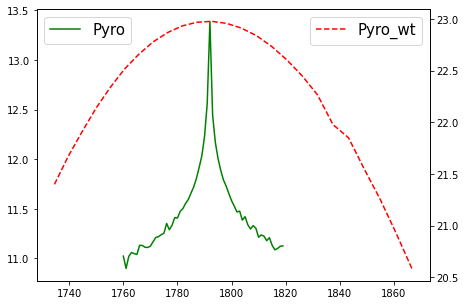

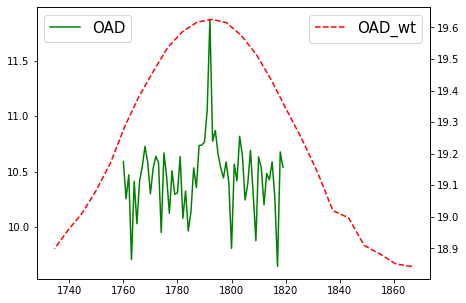

In [71]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df_01)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD = df_01.oad_noise.values[:SAMPLE_RATE]
OAD_f = rfft(OAD)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(1.0 / period, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='green', label='OAD')
ax2.plot(1.0 / period, np.log(mean_oad_noise_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

               x           y0          y1        y2          y3     oad_noise  \
0              0  820507000.0 -14444500.0 -227840.0 -13735900.0 -8.416772e+07   
1              1  859676000.0  -6947580.0 -219392.0 -12532000.0 -2.675225e+07   
2              2  833578000.0    829952.0 -211968.0 -13924400.0 -4.471787e+07   
3              3  905413000.0   8641790.0 -206080.0 -16608000.0 -1.189275e+08   
4              4  806905000.0  15951100.0 -196608.0 -16278500.0  1.321783e+08   
...          ...          ...         ...       ...         ...           ...   
9599995  9599995  702471000.0 -23103000.0 -188928.0 -11244300.0  3.787041e+07   
9599996  9599996  786943000.0 -16965100.0 -192512.0 -13622000.0 -1.351899e+08   
9599997  9599997  834429000.0  -9716480.0 -176128.0 -12947500.0  1.268942e+07   
9599998  9599998  827305000.0  -1933570.0 -163840.0 -12815100.0  2.199275e+08   
9599999  9599999  863073000.0   5976830.0 -177408.0 -15446000.0 -5.062487e+07   

           pyro_noise  
0  

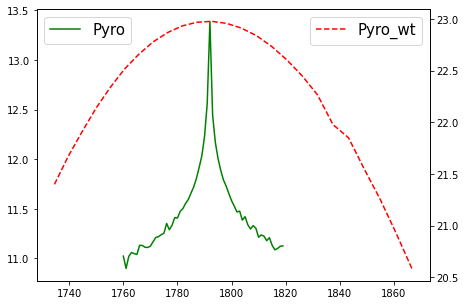

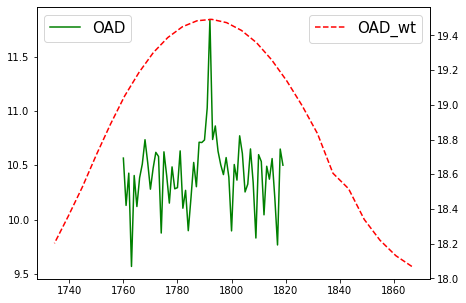

In [73]:
file_name = 'CH4 954 ppm raw/01'
df1 = pd.read_csv(file_name, delim_whitespace=True, quotechar="\"") 
print(df_01)
SAMPLE_RATE = 48000 #Hz
DURATION = 1 #sec
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

Pyro = df1.y0.values[:SAMPLE_RATE]
Pyro_f = rfft(Pyro)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

OAD_noise = sst_tr_oad[:SAMPLE_RATE]
OAD_noise_f = rfft(OAD_noise)

fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(Pyro_f[min_freq:max_freq])), 'green', label='Pyro')
ax2.plot(frequencies, np.log(mean_pyro_scales[1]), color='red', linestyle='--', label = 'Pyro_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')


fig = plt.figure()
fig.set_size_inches(15.5, 5.0)
ax1 = fig.add_subplot(122)
ax2 = ax1.twinx()
ax1.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_noise_f[min_freq:max_freq])), color='green', label='OAD')
# ax2.plot(xf[min_freq:max_freq], np.log10(np.abs(OAD_f[min_freq:max_freq])), color='red', label='OAD')
ax2.plot(frequencies, np.log(mean_tr_oad_noise_scales[1]), color='red', linestyle='--', label = 'OAD_wt')

ax1.legend(prop={'size': 15},loc='upper left')
ax2.legend(prop={'size': 15},loc='upper right')

In [74]:
# print(len(sst_tr))

[cfs_tr_pyro_noise, frequencies] = pywt.cwt(sst_tr_pyro, scales, wavelet, dt)

period = 1.0/frequencies

In [75]:
cfs_tr_pyro_noise = np.abs(cfs_tr_pyro_noise)
cfs_tr_pyro_shape_noise = np.array([cfs_tr_pyro_noise[i-1][slase:slase+size_shape] for i in range(len(scales))])

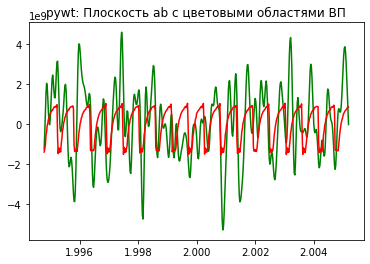

In [76]:
A_scales, B_time = np.meshgrid(time[slase:slase+size_shape]*dt, frequencies)
# A_scales, B_time = meshgrid(time[:size_shape],scales)

# cfs_oad_shape = array([cfs_oad[i-1][:size_shape] for i in scales])
# sst_oad = df_01.y1.iloc[:Size_pyro]

plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_tr_pyro[slase:slase+size_shape], color = 'green')
plt.plot(time[slase:slase+size_shape]*dt, sst_pyro[slase:slase+size_shape], color = 'red')
plt.show()

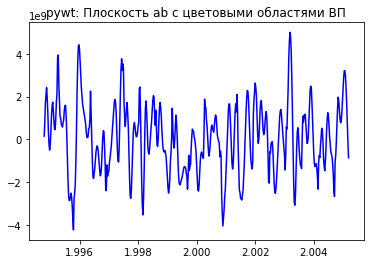

In [77]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)

plt.plot(time[slase:slase+size_shape]*dt, sst_tr_pyro[slase:slase+size_shape] - sst_pyro[slase:slase+size_shape],
         color = 'blue')

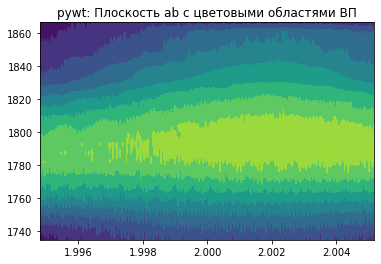

In [78]:
plt.figure('pywt: 2D-график для z = w (a,b)')
plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
plt.contourf(A_scales, B_time, np.abs(cfs_tr_pyro_shape_noise), 10)
plt.show()

# plt.figure('pywt: 2D-график для z = w (a,b)')
# plt.title('pywt: Плоскость ab с цветовыми областями ВП', size=12)
# # plt.contourf(A_scales, B_time, np.log(abs(cfs_oad_shape)), 10)
# plt.contourf(A_scales, B_time, cfs_oad_shape, 10)
# plt.show()

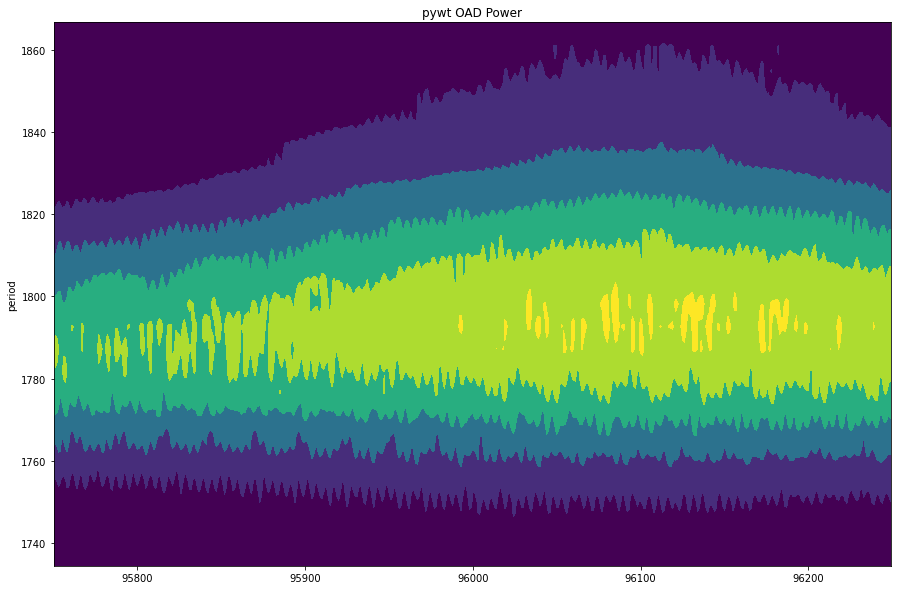

In [79]:
power_tr_pyro_shape_noise = (cfs_tr_pyro_shape_noise)**2

period = 1. / frequencies
# levels = [0.0625, 0.125, 0.25,]

f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time[slase:slase+size_shape], frequencies, np.abs(power_tr_pyro_shape_noise), extend='both')
ax.set_title("pywt OAD Power")
ax.set_ylabel('period')
plt.show()


# f, ax = plt.subplots(figsize=(15, 10))
# ax.contourf(time[slase:slase+size_shape], period, power_oad_shape, extend='both')
# ax.set_title("pywt OAD Power")
# ax.set_ylabel('period')
# plt.show()

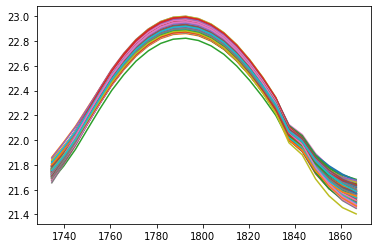

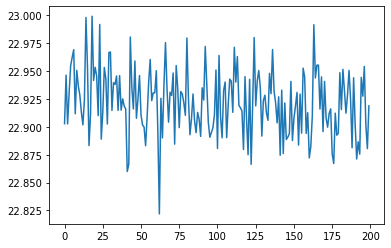

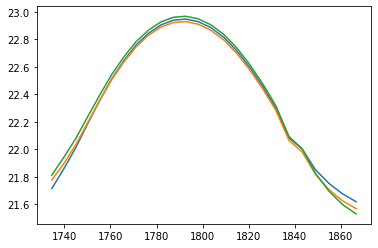

In [80]:
# power_oad_tr = power_oad.transpose()
power_tr_pyro_noise_tr = cfs_tr_pyro_noise.transpose()
# Amp_oad = zeros((interval))


mean_tr_pyro_noise_scales = np.zeros((interval,int(len(scales))))

Max_tr_pyro_noise_amp_scales = np.zeros((interval))

plt.figure('max_Amp')

for j in range(0,interval,1):
    temp_tr_pyro_noise = power_tr_pyro_noise_tr[delta_time*j:delta_time*(j+1)].transpose()
    for i in range(len(scales)):
        mean_tr_pyro_noise_scales[j][i-1] = temp_tr_pyro_noise[i-1].mean()
    plt.plot(frequencies, np.log(mean_tr_pyro_noise_scales[j]))
    Max_tr_pyro_noise_amp_scales[j] = mean_tr_pyro_noise_scales[j].max()
#     print(frequencies[mean_tr_oad_noise_scales[j].argmax()])
plt.show()

plt.figure('Max_oad')
plt.plot(np.log(Max_tr_pyro_noise_amp_scales))
# plt.plot(np.log(Max_tr_oad_amp_scales))

plt.show()

plt.figure('Max_oad 1')
plt.plot(frequencies, np.log(mean_tr_pyro_noise_scales[1]))
plt.plot(frequencies, np.log(mean_tr_pyro_noise_scales[10]))
plt.plot(frequencies, np.log(mean_tr_pyro_noise_scales[30]))
plt.show()

In [81]:
from pathlib import Path  

df_mean_tr_pyro_noise_scales = pd.DataFrame(mean_tr_pyro_noise_scales)
df_mean_tr_pyro_noise_scales.columns = period
# print(df_mean_pyro_scales)


filepath = Path('wt_raw/cmor1_1778_tr_pyro_noise_0_2_954.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)

df_mean_tr_pyro_noise_scales.to_csv(filepath) 

# print(df_mean_pyro_scales)

<Figure size 432x288 with 0 Axes>

1792.6829268292684


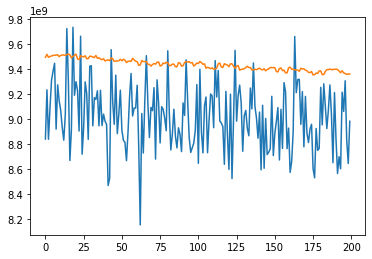

In [83]:
file_name_tr_pyro_noise = 'wt_raw/cmor1_1778_tr_pyro_noise_0_2_954.csv'
df_tr_pyro_noise_Amp = pd.read_csv(file_name_tr_pyro_noise) 
df_tr_pyro_noise_Amp = df_tr_pyro_noise_Amp.drop('Unnamed: 0', axis = 1)


mean_tr_pyro_noise_scales = df_tr_pyro_noise_Amp.to_numpy()

period = np.array([float(str_j) for str_j in list(df_tr_pyro_noise_Amp.columns)])

plt.figure('max_Amp')
    
Max_tr_pyro_noise_amp_scales = np.zeros((interval))

for j in range(0,interval,1):
#     plt.plot(frequencies, np.log(mean_tr_oad_noise_scales[j]))
    Max_tr_pyro_noise_amp_scales[j] = mean_tr_pyro_noise_scales[j].max()
#     print(1.0/(period[mean_oad_scales[j].argmax()]))
plt.show()

# plt.plot(1.0 / period, np.log(mean_tr_oad_noise_scales[1]))
# plt.plot(1.0 / period, np.log(mean_tr_oad_noise_scales[2]))
# plt.plot(1.0 / period, np.log(mean_tr_oad_noise_scales[3]))
print(1.0/period[mean_tr_pyro_noise_scales[1].argmax()])



plt.figure('Max_oad')
plt.plot(Max_tr_pyro_noise_amp_scales)
plt.plot(Max_pyro_amp_scales)
plt.show()    

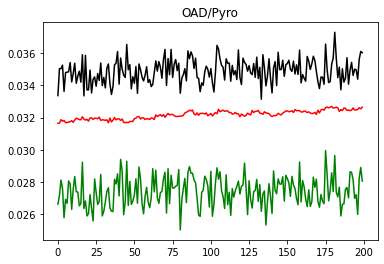

In [84]:
S_tr_noise_noise_wavelet = Max_tr_oad_noise_amp_scales/Max_pyro_noise_amp_scales
plt.figure('max_Amp')
plt.title('OAD/Pyro', size=12)
plt.plot(S_noise_wavelet, color = 'black')
plt.plot(S_tr_noise_noise_wavelet, color = 'green')
plt.plot(S_wavelet, color = 'red')
plt.show()